### Description of the Project 
1. Importing the Libraries and load the datasets
2. Exploring the data and visualization
3. Train and create logistic regression model
4. Evaluation of model(Precision, recall and F1 score), Confusion Matrix
5. Model Improvements

### Introdcution:
Regression analysis is used to predict the dependent variable based on the basis of one or more independent varibales. It explains the predict/impact of changes in the independent attributes on the dependent variable. The Logistic regression, also called a logit model, is used to model dichotomous outcome variables. In the logit model, the log odds of the outcome is modeled as a linear combination of the predictor variables. 

### Description of the data
I have collected this data from the URL-https://stats.idre.ucla.edu/ of Institute of Digital Research and Statistical Consulting. This datasets has the following features:-
gre, gpa and rank (There are three predictor variables:  gre, gpa and rank).
The dependent variable is admit which has two classes 1 and 0. If he/she admits then assigned 1, if he/she not admit then assigned 0.

### Evaluation 
This project is based on how independent variables such as GRE (Graduate Record Exam scores), GPA (grade point average) and prestige of the undergraduate institution would effect on admission into graduate school. The target variable is binay .i.e. either that student will be going to admit the school or not. After the preprocessing of the data, EDA and generate x and y variables, I built a Logistic regression model, which is checked by confusion_matrix and classification report. 

In [78]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [79]:
#import the data
data = pd.read_csv("https://stats.idre.ucla.edu/stat/data/binary.csv")
data.head()

,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4


In [80]:
data.tail(3)

,admit,gre,gpa,rank
397,0,460,2.63,2
398,0,700,3.65,2
399,0,600,3.89,3


In [81]:
data.isnull().sum()

admit    0
gre      0
gpa      0
rank     0
dtype: int64

In [82]:
data.dtypes

admit      int64
gre        int64
gpa      float64
rank       int64
dtype: object

In [83]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
admit,400.0,0.3175,0.466087,0.00,0.00,0.000,1.00,1.0
gre,400.0,587.7000,115.516536,220.00,520.00,580.000,660.00,800.0
gpa,400.0,3.3899,0.380567,2.26,3.13,3.395,3.67,4.0
rank,400.0,2.4850,0.944460,1.00,2.00,2.000,3.00,4.0


Text(0.5, 0, 'GPA')

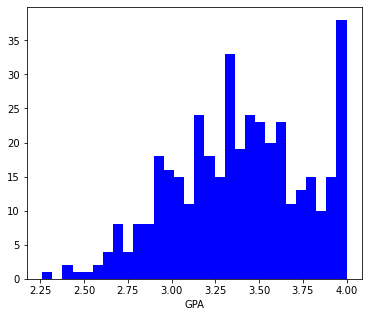

In [84]:
# Histogram
plt.figure(figsize=(6,5))
plt.hist(data['gpa'], bins=30, color='blue')
plt.xlabel('GPA')

Text(0.5, 0, 'gre_score')

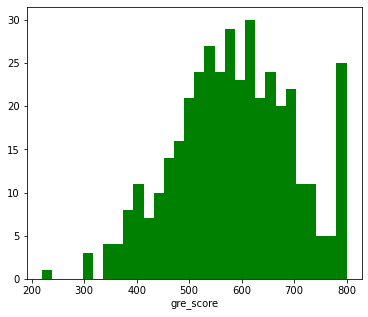

In [85]:
plt.figure(figsize=(6,5))
plt.hist(data['gre'], bins=30, color='green')
plt.xlabel('gre_score')

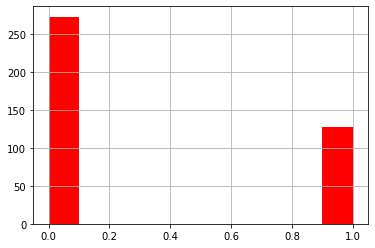

In [86]:
data['admit'].hist(color='red')

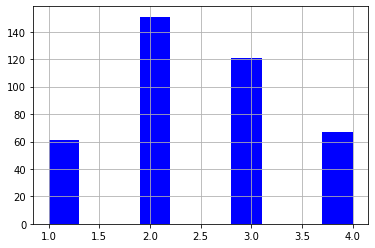

In [87]:
data['rank'].hist(color='blue')

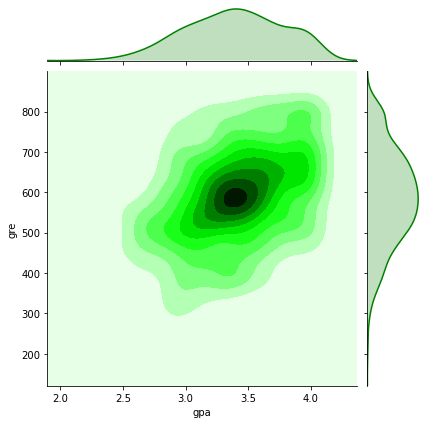

In [88]:
# Let's see the reationship between gpa and gre
sns.jointplot(x='gpa', y='gre', data=data, color='g', kind='kde')


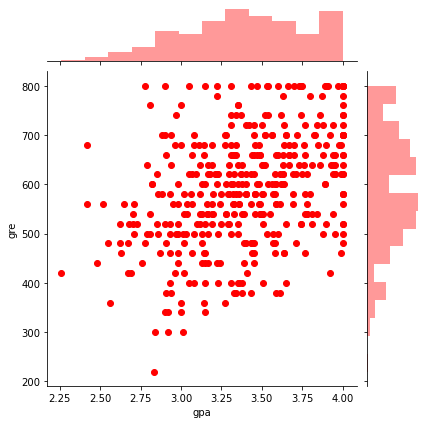

In [89]:
# Let's see the reationship between gpa and gre
sns.jointplot(x='gpa', y='gre', data=data, color='r')


In [90]:
# use dummies method for rank columns

dummy_rank=pd.get_dummies(data['rank'], prefix='rank')
dummy_rank.head()

,rank_1,rank_2,rank_3,rank_4
0,0,0,1,0
1,0,0,1,0
2,1,0,0,0
3,0,0,0,1
4,0,0,0,1


In [91]:
# Let's check the multicolinarity among the dummy variables
# If we find the multicolinarity then we leave one dummy variables
# Let's merge two DataFrames data and dummy_rank


In [92]:
cols_need = ['admit', 'gre', 'gpa']

In [93]:
data1 = data[cols_need].join(dummy_rank)
data1.head()

,admit,gre,gpa,rank_1,rank_2,rank_3,rank_4
0,0,380,3.61,0,0,1,0
1,1,660,3.67,0,0,1,0
2,1,800,4.00,1,0,0,0
3,1,640,3.19,0,0,0,1
4,0,520,2.93,0,0,0,1


In [94]:
# Let's drop rank_1 columns from dummy variables in order to reduce the multicolinarity
data1 = data1.drop('rank_1', axis=1)
data1.head()

,admit,gre,gpa,rank_2,rank_3,rank_4
0,0,380,3.61,0,1,0
1,1,660,3.67,0,1,0
2,1,800,4.00,0,0,0
3,1,640,3.19,0,0,1
4,0,520,2.93,0,0,1


In [95]:
from sklearn.model_selection import train_test_split

In [96]:
x = data1.iloc[0:,1:]
y = data1.iloc[0:,-6]

In [97]:
x.head()

,gre,gpa,rank_2,rank_3,rank_4
0,380,3.61,0,1,0
1,660,3.67,0,1,0
2,800,4.00,0,0,0
3,640,3.19,0,0,1
4,520,2.93,0,0,1


In [98]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: admit, dtype: int64

In [99]:
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.3, random_state=23)

In [100]:
 x_train.shape, y_train.shape, y_train.shape, y_test.shape

((280, 5), (280,), (280,), (120,))

In [101]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train, y_train)
pred = model.predict(x_test)

In [102]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.77      0.82      0.79        88
           1       0.38      0.31      0.34        32

    accuracy                           0.68       120
   macro avg       0.58      0.57      0.57       120
weighted avg       0.66      0.68      0.67       120



In [103]:
confusion_matrix(y_test, pred)

array([[72, 16],
       [22, 10]], dtype=int64)

In [104]:
# Let's only take two features gre and gpa

In [105]:
data1.head()

,admit,gre,gpa,rank_2,rank_3,rank_4
0,0,380,3.61,0,1,0
1,1,660,3.67,0,1,0
2,1,800,4.00,0,0,0
3,1,640,3.19,0,0,1
4,0,520,2.93,0,0,1


In [106]:
x= data[['gre', 'gpa']]
y = data['admit']

In [107]:
x.head()

,gre,gpa
0,380,3.61
1,660,3.67
2,800,4.00
3,640,3.19
4,520,2.93


In [108]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: admit, dtype: int64

In [109]:
x.shape, y.shape

((400, 2), (400,))

In [110]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=23)

In [111]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((280, 2), (280,), (120, 2), (120,))

In [112]:
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression()
model1.fit(x_train, y_train)
pred1 = model1.predict(x_test)

In [115]:
pred1

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0], dtype=int64)

In [118]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred1)

0.7083333333333334

In [113]:
print(classification_report(y_test, pred1))

              precision    recall  f1-score   support

           0       0.74      0.93      0.82        88
           1       0.33      0.09      0.15        32

    accuracy                           0.71       120
   macro avg       0.54      0.51      0.49       120
weighted avg       0.63      0.71      0.64       120



In [114]:
confusion_matrix(y_test, pred1)

array([[82,  6],
       [29,  3]], dtype=int64)

#### Reference: https://stats.idre.ucla.edu/stata/dae/logistic-regression/